# 0. Load and Explore Data

In [9]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import yaml
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from time import time as tt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read Data

In [44]:
input_dir = "/global/cfs/cdirs/m3443/data/MLCCD/test_data_1/corrected_10_CCD_image_dataframes.pkl"

# Read in the data
data = pd.read_pickle(input_dir)

In [60]:
np.unique(data[0].particle_id, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 array([ 29314,  35985,  45075,  17280,  36673,  67839, 114761, 150845]))

## Visualize Data

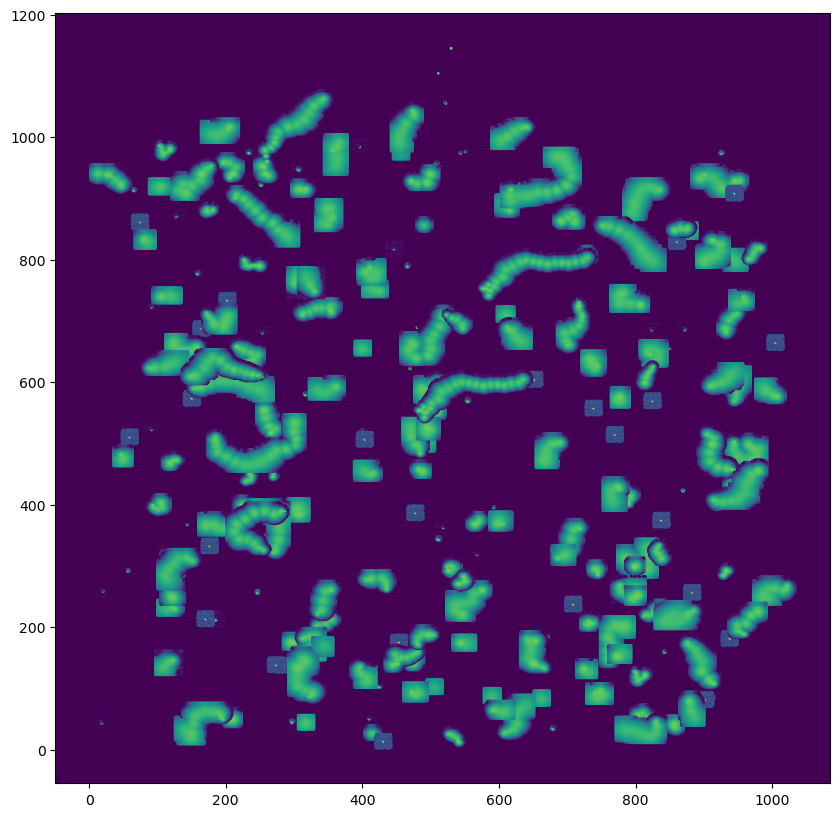

In [54]:
# Plot the data
fig, ax = plt.subplots(figsize=(10,10))

nonzero_mask = data[0]["charge"] > 1e-10
nonzero_data = data[0][nonzero_mask]

# Color is the log of dtrack value, colormap is blue to yellow
cmap = plt.cm.get_cmap('viridis')
cmap.set_bad(color='white')

color = np.log(nonzero_data["charge"]) 
normalized_color = (color - color.min()) / (color.max() - color.min())
ax.scatter(nonzero_data["x"], nonzero_data["y"], c=normalized_color, cmap=cmap, s=1)
ax.set_facecolor(cmap(normalized_color.min()))

<AxesSubplot: xlabel='charge', ylabel='Count'>

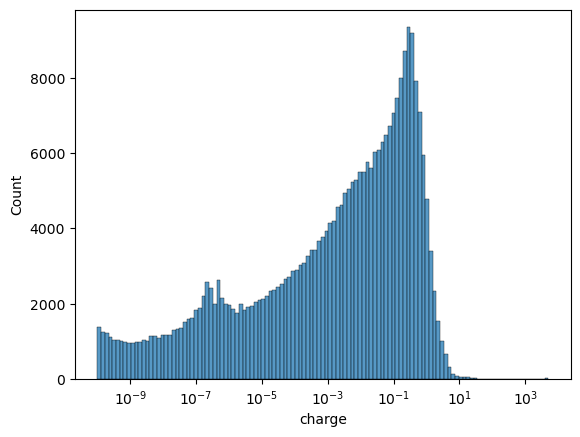

In [55]:
sns.histplot(nonzero_data["charge"], log_scale=True)